### Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


### Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset

In [2]:
from sklearn.datasets import load_breast_cancer #importer depuis Sklearn le dataset breast cancer

### Mise au format Numpy des données

In [3]:
# Transformer en tableau numpy le dataset chargé
data, target = load_breast_cancer(return_X_y=True, as_frame=False)

In [4]:
data.shape

(569, 30)

In [5]:
target.shape

(569,)

In [6]:
# Redimenssionner le target
target = target.reshape((target.shape[0],1))

In [7]:
target.shape

(569, 1)

In [8]:
# Relabelliser les patients malades=1 et non malades=0
y = np.where(target==1,0,1)

In [9]:
y.shape

(569, 1)

### Echantillonnage des données

In [10]:
113/569

0.19859402460456943

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.198, stratify=y, random_state=42 ) #Tjs utiliser stratify sur classif

In [14]:
xtrain.shape

(456, 30)

In [15]:
xtest.shape

(113, 30)

### Afficher sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test en fonction de chaque catégorie (bénigne et maline)

In [16]:
#X, y = np.meshgrid(X, y)

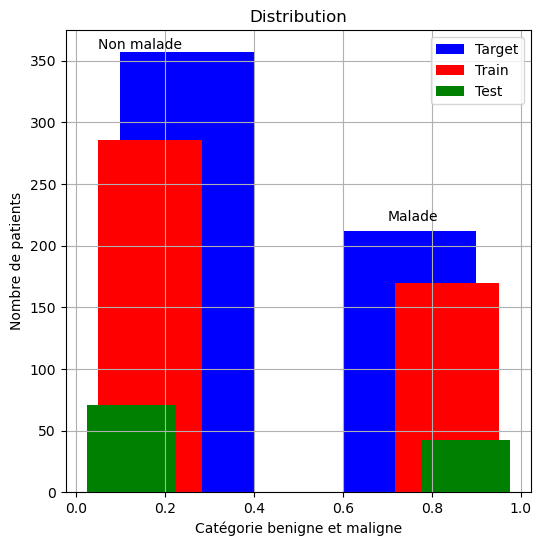

In [17]:
plt.figure(1, figsize=(6,6)) # Création d'une figure

# premiere courbe
plt.hist(y, bins=2, color='blue', rwidth=0.6, label='Target')
# deuxieme courbe
plt.hist(ytrain, bins=3, color='red', rwidth=0.7, label='Train')
# troisième courbe
plt.hist(ytest, bins=4, color='green', rwidth=0.8, label='Test')
# Extra informations
plt.grid()
plt.title('Distribution') # titre
plt.xlabel('Catégorie benigne et maligne') # axes abscisses
plt.ylabel('Nombre de patients') # axes ordonnées
    plt.legend() # legend
plt.text(x=0.05, y=360, s='Non malade')
plt.text(x=0.7, y=220, s='Malade')
plt.savefig('figure_1.png') # sauvegarde la figure dans le repertoire de travail
plt.show() # affiche la figure


### Effectuer le Feature Scaling

In [18]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler
scaler.mean_
X_scaled = scaler.transform(xtrain)
X_scaled
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 0.1, max_iter = 10000))
# Appliquer la mise à l’échelle sur les données d’apprentissage
pipe.fit(xtrain, ytrain)
#effectuer une prédiction sur les données d'apprentissage
ypred_tr = pipe.predict(xtrain)
# Calcul du score de l'apprentissage
trsc = pipe.score(xtrain, ytrain)
# Appliquer la prédiction sur le jeu de test à travers le pipeline
ypred = pipe.predict(xtest)
# Appliquer la mise à l’échelle sur les données de test sans fuite de données d’apprentissage
# Calcul du score de test
ptsc = pipe.score(xtest, ytest)  

C:\Users\Utilisateur\conda\anaconda3\envs\learn\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
ytrain.shape

(456, 1)

In [21]:
ypred_tr = ypred_tr.reshape((ypred_tr.shape[0],1))

In [22]:
ypred_tr.shape

(456, 1)

In [23]:
trsc

0.9802631578947368

In [24]:
ptsc

0.9823008849557522

### Entrainer le modèle de régression logistique

In [25]:
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(C = 0.1, max_iter = 10000).fit(xtrain, ytrain)
#ypred = model.predict(xtest)
#model.predict_proba(xtest)
#model.score(xtest, ypred)

### Calculer et afficher les performances obtenues sur le jeu d'apprentissage

In [26]:
from sklearn.metrics import confusion_matrix 

In [27]:
# Utiliser la matrisse de confusion
cm = confusion_matrix(ytrain, ypred_tr)
cm

array([[284,   2],
       [  7, 163]], dtype=int64)

<Axes: >

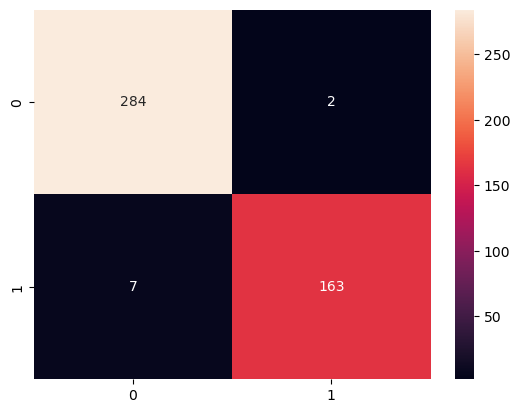

In [28]:
# Afficher la matrisse de confusion dns un graphique
sns.heatmap(cm, annot=True,fmt='' )

In [29]:
# Taux de classification calculer l'accuracy du modèle
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
asc = accuracy_score(ytrain, ypred_tr)
asc

0.9802631578947368

In [30]:
# Precision/Recall caalculer la precision et le rappel du modèle
rsc = recall_score(ytrain, ypred_tr)
rsc

0.9588235294117647

In [31]:
psc = precision_score(ytrain, ypred_tr)
psc

0.9878787878787879

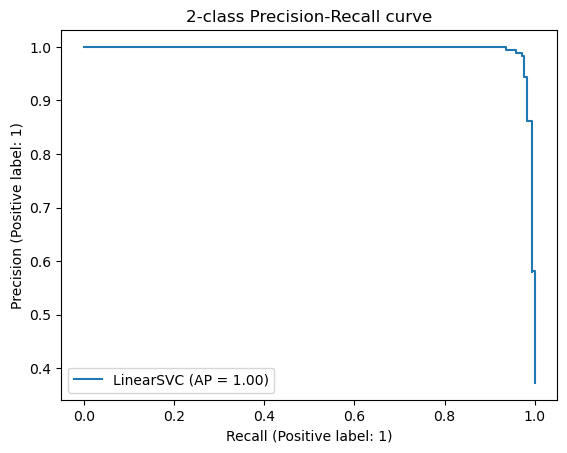

In [32]:
# Affichage dans graphique du PR Curve
## Add noisy features
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
# Importer les modules pour utiliser PR Curve
from sklearn.svm import LinearSVC
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    pipe, xtrain, ytrain, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [33]:
# Calcul du F1-Score
fsc = f1_score(ytrain, ypred_tr)
fsc

0.973134328358209

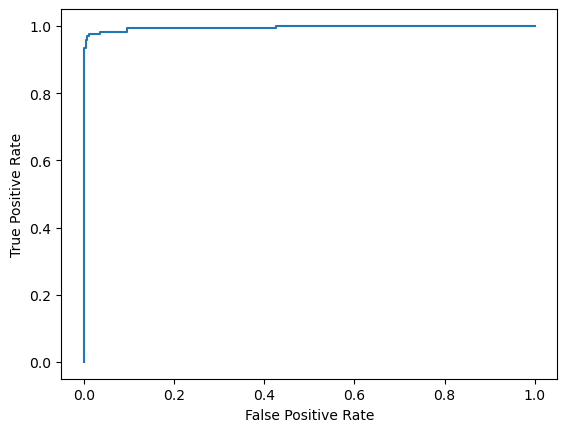

In [34]:
# Calcul deu ROC et AUC
trrasc = roc_auc_score(ytrain, ypred_tr)
trrasc
# Afficher la courbe ROC
from sklearn.metrics import RocCurveDisplay, roc_curve

yptr_score = pipe.decision_function(xtrain)

fpr, tpr, _ = roc_curve(ytrain, yptr_score, pos_label=pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Calculer et afficher les performances obtenues sur le jeu de test

In [35]:
# Utiliser la matrisse de confusion
cm = confusion_matrix(ytest, ypred)
cm

array([[71,  0],
       [ 2, 40]], dtype=int64)

<Axes: >

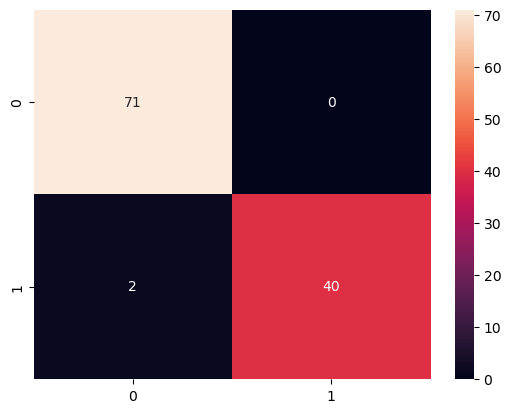

In [36]:
# Afficher la matrisse de confusion dns un graphique
sns.heatmap(cm, annot=True)

In [37]:
asc = accuracy_score(ytest, ypred)
asc

0.9823008849557522

In [38]:
# Precision/Recall caalculer la precision et le rappel du modèle
rsc = recall_score(ytest, ypred)
rsc

0.9523809523809523

In [39]:
psc = precision_score(ytest, ypred)
psc

1.0

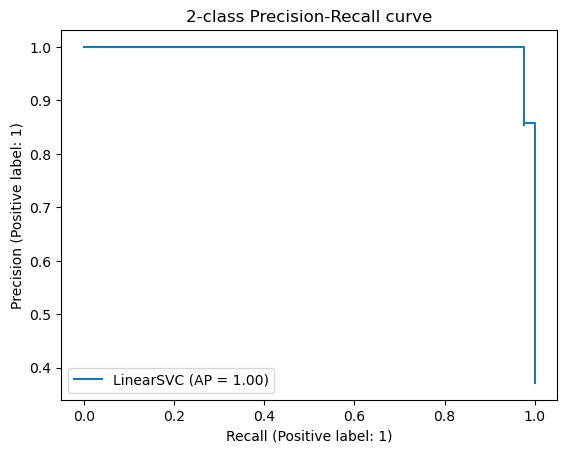

In [40]:
# Affichage dans graphique du PR Curve
display = PrecisionRecallDisplay.from_estimator(
    pipe, xtest, ytest, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [41]:
# Calcul du F1-Score
fsc = f1_score(ytest, ypred)
fsc

0.975609756097561

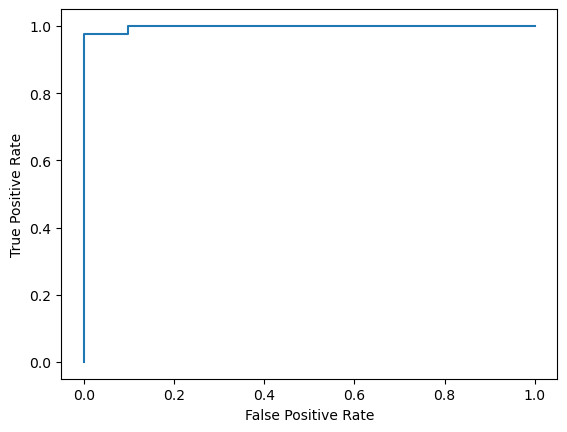

In [42]:
# Calcul deu ROC et AUC
ttrasc = roc_auc_score(ytest, ypred)
ttrasc
# Afficher la courbe ROC
from sklearn.metrics import RocCurveDisplay, roc_curve

ypred_score = pipe.decision_function(xtest)

fpr, tpr, _ = roc_curve(ytest, ypred_score, pos_label=pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()